# Import

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure


# Funkcije

In [2]:
def prebroj_snimke():
    snimci = os.listdir('snimci')
    broj_snimaka = len(snimci)
    return broj_snimaka

def ucitaj_snimak(brojSnimka):
    return cv2.VideoCapture('snimci/video'+str(brojSnimka)+'.mp4')

# Analiza slike

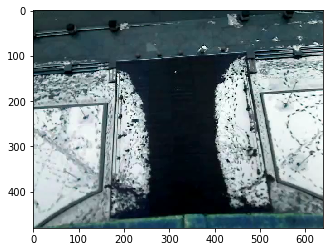

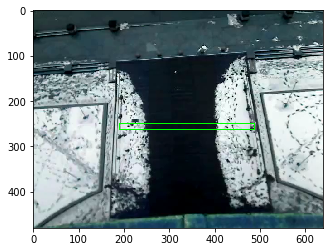

video1.mp4,4
video2.mp4,24
video3.mp4,14
video4.mp4,26
video5.mp4,18
video6.mp4,29
video7.mp4,26
video8.mp4,12
video9.mp4,6
video10.mp4,11
Gotovo


In [6]:
snimak = ucitaj_snimak(1)
rval , slika = snimak.read()
plt.imshow(slika)
plt.show()

invertovana_slika = 255-slika
#plt.imshow(invertovana_slika)
#plt.show()

slika_siva = cv2.cvtColor(invertovana_slika, cv2.COLOR_RGB2GRAY)
#plt.imshow(slika_siva)
#plt.show()

ret, binarna = cv2.threshold(slika_siva, 190, 255, cv2.THRESH_BINARY)
#plt.imshow(binarna)
#plt.show()

kernel = np.ones((3, 3))
binarna = cv2.dilate(binarna, kernel, iterations=2)
binarna = cv2.erode(binarna, kernel, iterations=10)

#plt.imshow(binarna)
#plt.show()

#pronalazimo sve konture na slici
image, contours, hierarchy = cv2.findContours(binarna, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#slika_konture = slika.copy()
#cv2.drawContours(slika_konture, contours, -1, (0, 255, 0), 1)
#plt.imshow(slika_konture)
#plt.show()

plato = max(contours, key=cv2.contourArea) #najveca kontura predstavlja plato

(x,y,w,h) = cv2.boundingRect(plato) 

izdvojen_plato = slika.copy()
cv2.rectangle(izdvojen_plato, (x,y+150), (x+w+50,y+h-190), (0,255,0), 2)
plt.imshow(izdvojen_plato)
plt.show()


out = open("out.txt", "w")
out.write("SW-81-2016, Dragana Hrcek\nfile,count\n")
broj_snimaka = prebroj_snimke()

for i in range(0,broj_snimaka):
    snimak = ucitaj_snimak(i+1)
    uspesno_ucitano, prethodna_slika = snimak.read()
    ukupno = 0
    preskoci = 0
    while uspesno_ucitano:
        uspesno_ucitano, slika = snimak.read()
        if uspesno_ucitano and preskoci == 0:
            siv_prethodni = cv2.cvtColor(prethodna_slika, cv2.COLOR_RGB2GRAY)
            siv_trenutni  =  cv2.cvtColor(slika, cv2.COLOR_RGB2GRAY)
            prethodna_slika = slika
            diff = cv2.absdiff(siv_trenutni, siv_prethodni)
            binarna = cv2.adaptiveThreshold(diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 4)

            binarna = cv2.dilate(binarna, kernel, iterations=1) #povecava BELO
            binarna = cv2.erode(binarna, kernel, iterations=3) #povecava CRNO
            
            #plt.imshow(slika)
            #plt.show()
            #plt.imshow(binarna)
            #plt.show()
            
            img, contours, hierarchy = cv2.findContours(binarna, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

            ljudi = [] 
            for contour in contours:
                center, size, angle = cv2.minAreaRect(contour)
                width, height = size
                center = list(center)
                if center[0] > (x) and center[0] < (x+w+50)  and center[1] > (y+150) and center[1] < (y+h-190):
                    if width > 8 and height > 11 and width<70 and height <70: 
                        ljudi.append(contour)          
            ukupno = ukupno + len(ljudi)      
        preskoci = (preskoci+1)%6
    out.write("video"+str(i+1)+".mp4,"+str(ukupno)+"\n")
    print("video"+str(i+1)+".mp4,"+str(ukupno))
print ("Gotovo")

        

# TEST

In [7]:
import sys

res = []
n = 0
with open('res.txt') as file:	
    data = file.read()
    lines = data.split('\n')
    for id, line in enumerate(lines):
        if(id>0):
            cols = line.split(',')
            if(cols[0] == ''):
                continue
            print (cols)
            cols[1] = cols[1].replace('\r', '')
            res.append(float(cols[1]))
            n += 1

correct = 0
student = []
student_results = []
with open("out.txt") as file:
    data = file.read()
    lines = data.split('\n')
    for id, line in enumerate(lines):
        cols = line.split(',')
        if(cols[0] == ''):
            continue
        if(id==0):
            student = cols  
        elif(id>1):
            cols[1] = cols[1].replace('\r', '')
            student_results.append(float(cols[1]))

diff = 0
for index, res_col in enumerate(res):
    diff += abs(res_col - student_results[index])
percentage = 100 - diff/sum(res)*100

print (student)
print ('Procenat tacnosti:\t'+str(percentage))
print ('Ukupno:\t'+str(n))

['video1.mp4', '4']
['video2.mp4', '24']
['video3.mp4', '17']
['video4.mp4', '23']
['video5.mp4', '17']
['video6.mp4', '27']
['video7.mp4', '29']
['video8.mp4', '22']
['video9.mp4', '10']
['video10.mp4', '23']
['SW-81-2016', ' Dragana Hrcek']
Procenat tacnosti:	80.61224489795919
Ukupno:	10


# Proba

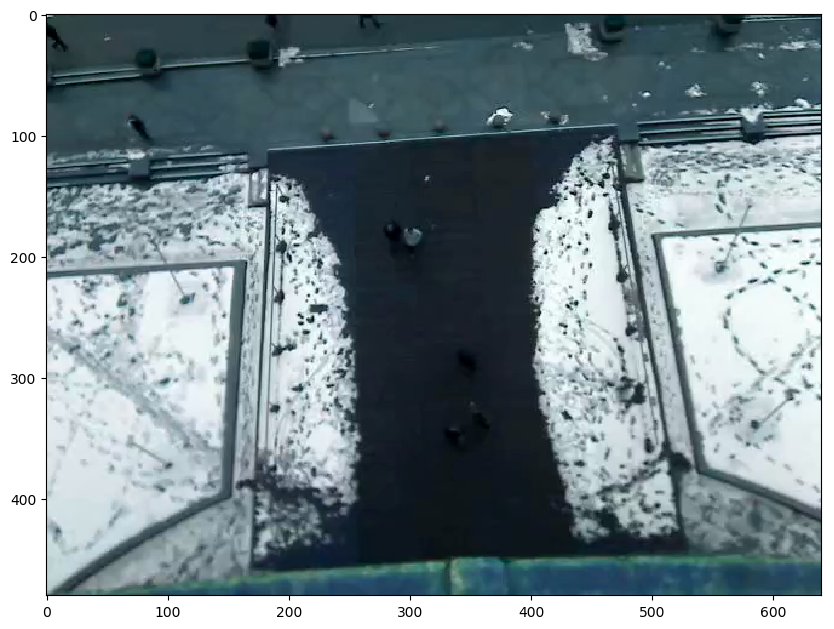

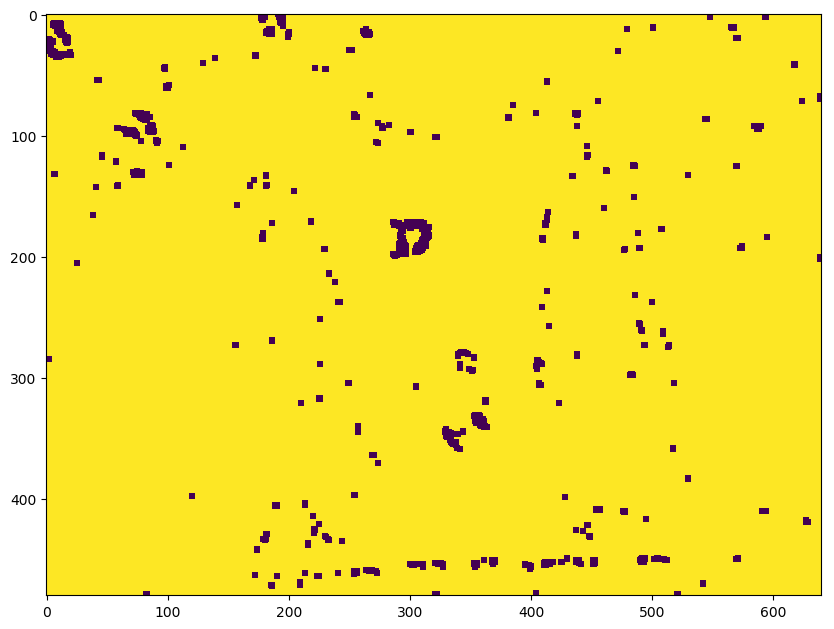

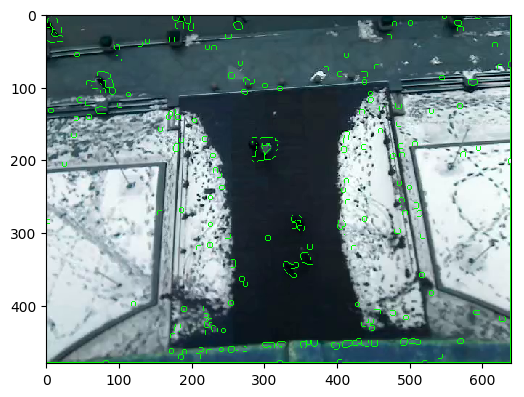

In [21]:
snimak1 = ucitaj_snimak(1)
snimak2 = ucitaj_snimak(2)

figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
rval , slika = snimak2.read()
plt.imshow(slika)
plt.show()

rval , slika1 = snimak1.read()

s1 = cv2.cvtColor(slika, cv2.COLOR_RGB2GRAY)
s2 = cv2.cvtColor(slika1, cv2.COLOR_RGB2GRAY)

diff = cv2.absdiff(s2, s1)
binarna = cv2.adaptiveThreshold(diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 5)

binarna = cv2.dilate(binarna, kernel, iterations=1) #povecava BELO
binarna = cv2.erode(binarna, kernel, iterations=2) #povecava CRNO

figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(binarna)
plt.show()

img, contours, hierarchy = cv2.findContours(binarna, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
slika_konture = slika.copy()
cv2.drawContours(slika_konture, contours, -1, (0, 255, 0), 1)
figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')

plt.imshow(slika_konture)
plt.show()


